In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [3]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [4]:
columns_to_drop = ['date', 'preferred_foot', 'attacking_work_rate','defensive_work_rate']
df = df.drop(columns=columns_to_drop)

In [5]:
df = df.dropna(subset=['overall_rating'])

In [6]:
df.isnull().sum()

id                       0
player_fifa_api_id       0
player_api_id            0
overall_rating           0
potential                0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys               1877
dribbling                0
curve                 1877
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility               1877
reactions                0
balance               1877
shot_power               0
jumping               1877
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                1877
penalties                0
marking                  0
standing_tackle          0
sliding_tackle        1877
gk_diving                0
gk_handling              0
gk_kicking               0
gk_positioning           0
g

In [7]:
df = df.fillna(df.mean())

In [8]:
df.isnull().sum()

id                    0
player_fifa_api_id    0
player_api_id         0
overall_rating        0
potential             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64

In [9]:
X = df.drop('overall_rating', axis=1)  # Assuming 'overall_rating' is the target variable
y = df['overall_rating']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [12]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
predictions = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, predictions)
rmse_1 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_1}")
r2_1 = r2_score(y_test,predictions)
print(f"R-Square Score: {r2_1}")

Root Mean Squared Error: 1.542673275299407
R-Square Score: 0.9520325146504862


In [15]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse_2 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_2}")
r2_2 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_2}")

Root Mean Squared Error: 2.6452955614976674
R-Square Score: 0.8589583285655887


In [20]:
model = Ridge(alpha=1.0)

In [21]:
model.fit(X_train,y_train)

Ridge()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse_3 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_3}")
r2_3 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_3}")

Root Mean Squared Error: 2.6452955682467296
R-Square Score: 0.8589583278458968


In [24]:
model = Lasso(alpha=1.0)

In [25]:
model.fit(X_train,y_train)

Lasso()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse_4 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_4}")
r2_4 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_4}")

Root Mean Squared Error: 2.6789096199047346
R-Square Score: 0.8553510907627045


In [28]:
model = ElasticNet(alpha=1.0,l1_ratio=0.5)

In [29]:
model.fit(X_train,y_train)

ElasticNet()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse_5 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_5}")
r2_5 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_5}")

Root Mean Squared Error: 2.659102849363483
R-Square Score: 0.8574821341595025


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model =RandomForestRegressor(n_estimators=100,random_state=42)

In [34]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse_6 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_6}")
r2_6 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_6}")

Root Mean Squared Error: 1.0280391517790914
R-Square Score: 0.9786980996487425


In [37]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [38]:
model = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,random_state=42)

In [39]:
model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse_7 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_7}")
r2_7 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_7}")

Root Mean Squared Error: 1.7492151014626978
R-Square Score: 0.9383283631050269


In [42]:
model = AdaBoostRegressor(n_estimators=100,random_state=42)

In [43]:
model.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [44]:
y_pred = model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
rmse_8 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_8}")
r2_8 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_8}")

Root Mean Squared Error: 3.2534415629097153
R-Square Score: 0.7866537269655072


In [46]:
import lightgbm as lgb

In [47]:
model = lgb.LGBMRegressor()

In [48]:
model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3789
[LightGBM] [Info] Number of data points in the train set: 109885, number of used features: 37
[LightGBM] [Info] Start training from score 68.605415


LGBMRegressor()

In [49]:
y_pred = model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
rmse_9 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_9}")
r2_9 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_9}")

Root Mean Squared Error: 1.306360098227618
R-Square Score: 0.9656026604914791


In [52]:
from catboost import CatBoostRegressor

In [53]:
model = CatBoostRegressor(iterations=100,learning_rate=0.1,depth=6)

In [54]:
model.fit(X_train,y_train)

0:	learn: 6.5469202	total: 160ms	remaining: 15.9s
1:	learn: 6.1148085	total: 171ms	remaining: 8.36s
2:	learn: 5.7295140	total: 180ms	remaining: 5.83s
3:	learn: 5.3867196	total: 190ms	remaining: 4.56s
4:	learn: 5.0803436	total: 200ms	remaining: 3.8s
5:	learn: 4.8049267	total: 210ms	remaining: 3.28s
6:	learn: 4.5627280	total: 219ms	remaining: 2.92s
7:	learn: 4.3379141	total: 229ms	remaining: 2.63s
8:	learn: 4.1060248	total: 238ms	remaining: 2.41s
9:	learn: 3.9132574	total: 247ms	remaining: 2.22s
10:	learn: 3.7396919	total: 255ms	remaining: 2.06s
11:	learn: 3.5781975	total: 264ms	remaining: 1.94s
12:	learn: 3.4373702	total: 273ms	remaining: 1.82s
13:	learn: 3.3026651	total: 281ms	remaining: 1.73s
14:	learn: 3.1829410	total: 291ms	remaining: 1.65s
15:	learn: 3.0719643	total: 302ms	remaining: 1.58s
16:	learn: 2.9676796	total: 311ms	remaining: 1.52s
17:	learn: 2.8847708	total: 320ms	remaining: 1.46s
18:	learn: 2.7917577	total: 331ms	remaining: 1.41s
19:	learn: 2.7214398	total: 341ms	remainin

In [55]:
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
rmse_10 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_10}")
r2_10 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_10}")

Root Mean Squared Error: 1.5410546493549506
R-Square Score: 0.9521331201195706


In [57]:
from xgboost import XGBRegressor

In [58]:
model = XGBRegressor(objective='reg:squarederror',colsample_bytree=0.3,learning_rate =0.1,max_depth = 5 , alpha = 10,n_estimators = 100)

In [59]:
model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [60]:
y_pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse_11 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_11}")
r2_11 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_11}")

Root Mean Squared Error: 1.3641723281460898
R-Square Score: 0.9624908250958836


In [62]:
from sklearn.svm import SVR

In [63]:
model = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)

In [64]:
model.fit(X_train,y_train)

SVR(C=100, gamma=0.1)

In [65]:
y_pred = model.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
rmse_12 = sqrt(mse)
print(f"Root Mean Squared Error: {rmse_12}")
r2_12 = r2_score(y_test,y_pred)
print(f"R-Square Score: {r2_12}")

Root Mean Squared Error: 5.068594458065141
R-Square Score: 0.48218559443788767


In [67]:
x_axis = ['DT','Linear','Ridge','Lasso','ElasticNet','RF','GBR','ADA','LGBM','CAT','XGB','SVR']
rmse_scores = [rmse_1,rmse_2,rmse_3, rmse_4, rmse_5, rmse_6,rmse_7,rmse_8,rmse_9,rmse_10,rmse_11,rmse_12]
r2_scores = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9, r2_10, r2_11, r2_12]  

In [68]:
import matplotlib.pyplot as plt

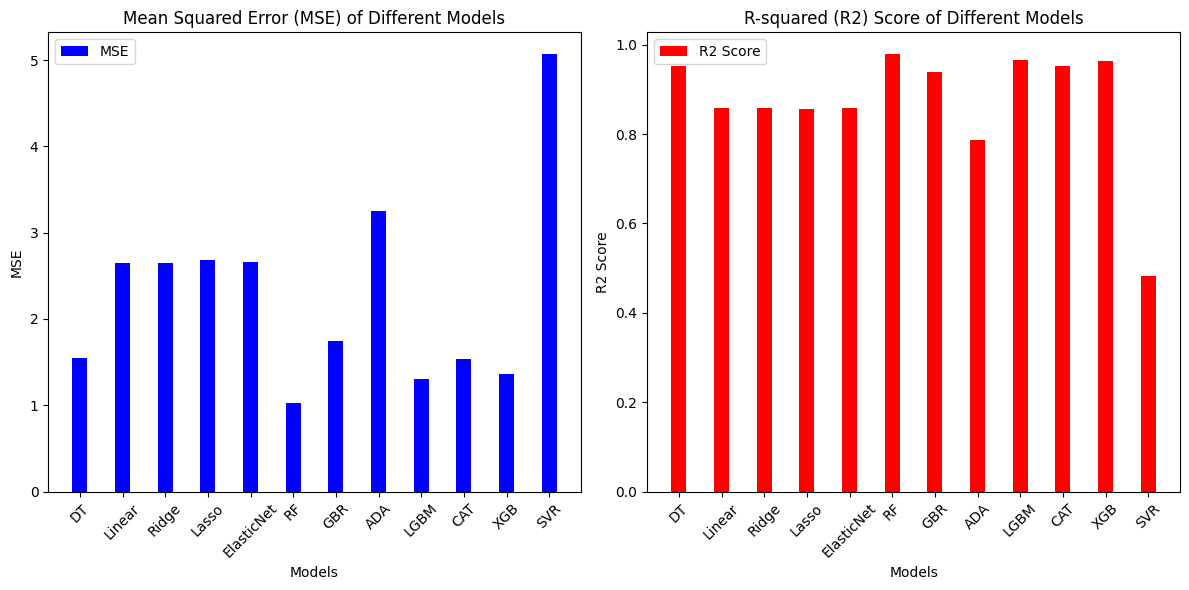

In [69]:
x = range(len(x_axis))
width = 0.35

# Create the bar plot for RMSE scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x, rmse_scores, width, label='MSE', color='b')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xticks(x, x_axis, rotation=45)
plt.legend()

# Create the bar plot for R2 scores
plt.subplot(1, 2, 2)
plt.bar(x, r2_scores, width, label='R2 Score', color='r')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R-squared (R2) Score of Different Models')
plt.xticks(x, x_axis, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()